# ECE 311 Lab Final:

## Due Date: Tuesday, 12/12 @ 11:59PM
### Note: a 10% penalty will be applied for each hour your submission is late!

This lab final will review the import concepts from the course. Much of this lab should be familiar from previous labs. We encourage you to look back on your previous labs to remind you how to produce your results and evaluate their correctness. Enough talking, let's get started!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from scipy import signal
from pz_plot import pz_plot
from scipy.io import wavfile
from numpy.random import randn
from IPython.display import Audio

#Utility function for dB scaling of magnitude spectra
def sig2db(mag_spec):
    return 20*np.log10(mag_spec)

%matplotlib inline

# Exercise 1: Building an Edge Detector 2.0

In Lab 2 Exercise 4, we built a simple edge detector by applying a high-pass filter along the rows and columns of an image, then combined the two results to create an image of detected edges. In this exercise, we will build a more sophisticated edge detector by adding onto our original design. This improved detector is known as the [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator).

The Sobel operator uses the same intuition of finding horizontal and vertical edges separately, then combining these results to form the image. Let $G_x$ be our resulting image from detecting vertical edges (through the x-axis) and $G_y$ be our resulting image from detecting horizontal edges (through the y-axis, then our final result will be given by

$$
G[i,j] = \sqrt{G^2_x[i,j]+G^2_y[i,j]},
$$

where $G[i,j]$ is the pixel value at row $i$, column $j$. We compute $G_x$ and $G_y$ via convolution as follows:

$$
G_x = I * \begin{bmatrix}
1 & 0 & -1\\
\end{bmatrix} * \begin{bmatrix}
1\\
2\\
1\\
\end{bmatrix}
$$

$$
G_y = I * \begin{bmatrix}
1\\
0\\
-1\\
\end{bmatrix} * \begin{bmatrix}
1 & 2 & 1\\
\end{bmatrix},
$$

where $I$ is our original image and $*$ denotes the convolution operator. Note that in the computation of $G_x$ we convolve along the rows with a high-pass filter and convolve along the columns with a low-pass filter, while the computation of $G_y$ reverses this relationship with the same filters.

a. Compute the image $G_x$ by performing the two convolutions along the rows and columns, respectively, using $\textrm{signal.convolve()}$. Plot your resulting image in grayscale. Remember that you should apply the high-pass filter $\begin{bmatrix}1 & 0 & -1\end{bmatrix}$ to each **row** and the low-pass filter $\begin{bmatrix}1 & 2 & 1\end{bmatrix}$ to each **column**. Also, be sure to use the "same" mode when using $\textrm{signal.convolve()}$.

b. Compute the image $G_y$ by performing the two convolutions along the rows and columns, respectively, using $\textrm{signal.convolve()}$. Plot your resulting image in grayscale. Remember that you should apply the high-pass filter $\begin{bmatrix}1 & 0 & -1\end{bmatrix}$ to each **column** and the low-pass filter $\begin{bmatrix}1 & 2 & 1\end{bmatrix}$ to each **row**.

c. Create final result image $G$ according to the above formulation. Plot your resulting image in grayscale.

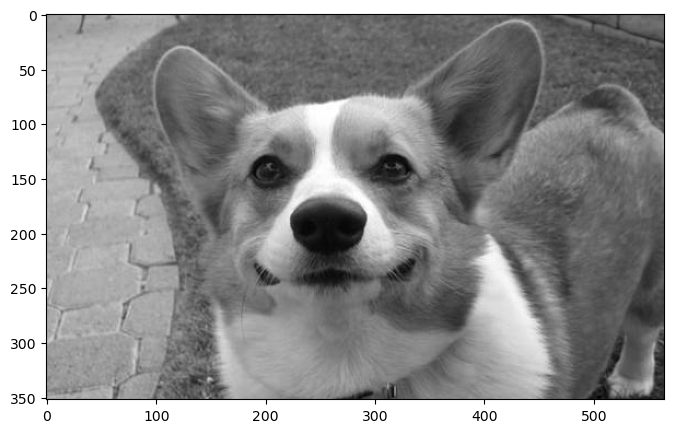

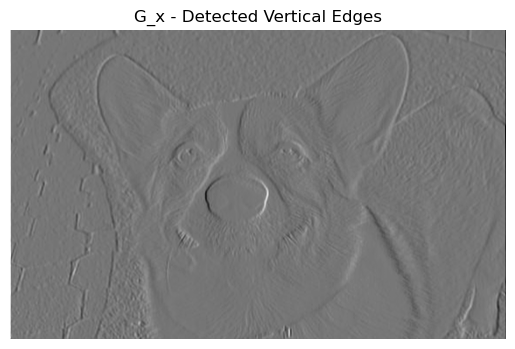

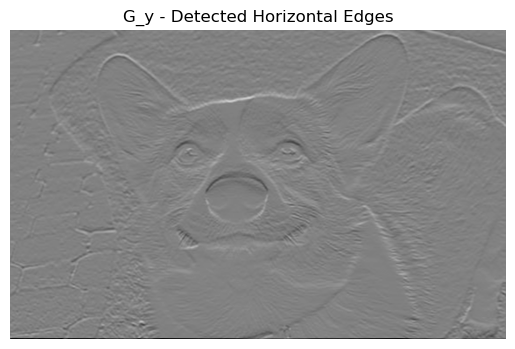

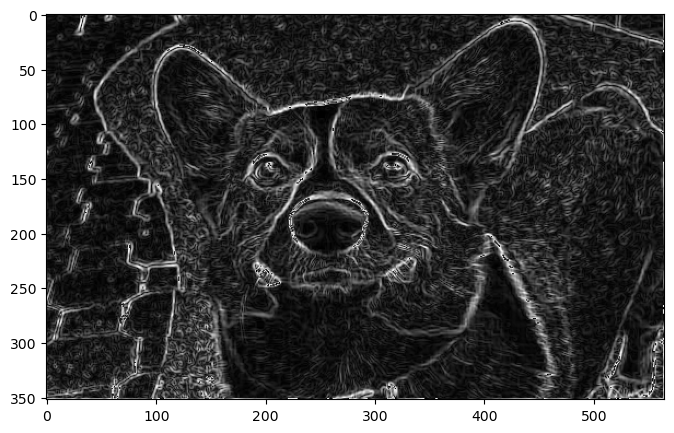

In [53]:
#load test-image.jpg
image = imread('test-image.jpg')
n_rows,n_cols = image.shape

plt.figure(figsize=(16,5))
plt.imshow(image, 'gray')

#Code for part a.
high_pass = np.array([1, 0, -1])
low_pass = np.array([1, 2, 1])

G_x = np.zeros(image.shape)

for i in range(n_rows):
    G_x[i,:] = signal.convolve(image[i,:], high_pass, mode='same')
for i in range(n_cols):
    G_x[:,i] = signal.convolve(G_x[:,i], low_pass, mode='same')


# Plot the resulting image in grayscale
plt.figure()
plt.imshow(G_x, cmap='gray')
plt.title('G_x - Detected Vertical Edges')
plt.axis('off')
plt.show()

#Code for part b:
G_y = np.zeros(image.shape)

for i in range(n_cols):
    G_y[:,i] = signal.convolve(image[:,i], high_pass, mode='same')
for i in range(n_rows):
    G_y[i,:] = signal.convolve(G_y[i,:], low_pass, mode='same')

plt.figure()
plt.imshow(G_y, cmap='gray')
plt.title('G_y - Detected Horizontal Edges')
plt.axis('off')
plt.show()

#Code for part c:

G = np.sqrt(G_x**2 + G_y**2)

# Plot the resulting image in grayscale
G = np.sqrt( (G_x**2) + (G_y**2) )
plt.figure(figsize=(16,5))
plt.imshow(G.astype(np.uint8), 'gray')

# Exercise 2: LCCDE, Transfer Function, and Impulse Response

For each of the following Linear Constant Coefficient Difference Equations (LCCDE), determine the transfer function (numerator and denominator coefficients) in order to plot both the pole-zero plot and impulse response of the system for the requested number of points. **Please plot your impulse responses as a stem plot!** For each system, indicate whether it is BIBO stable, marginally stable, or not BIBO stable and briefly explain your choice.

Note: We have provided the $\textrm{pz_plot}()$ function from Lab 3 to create your pole-zero plots. Refer to Lab 3 for usage of this function. Some other functions of interest you may want to use from Lab 3 will be $\textrm{signal.dimpulse()}$ and $\textrm{signal.tf2zpk()}$.

a. $y_1[n] = \frac{1}{3}x[n]-2x[n-1]+x[n-2]-
2x[n-3]+\frac{1}{3}x[n-4],\quad 0\leq n < 8$

b. $y_2[n] = x[n] + \frac{1}{4}x[n-2] - 2y_2[n-1] + 3y_2[n-2],\quad 0\leq n < 20$

c. $y_3[n] = x[n] - \frac{1}{2}x[n-2] - y_3[n-3], \quad 0\leq n < 20$

Text(0.5, 1.0, 'Impulse Response of System y3')

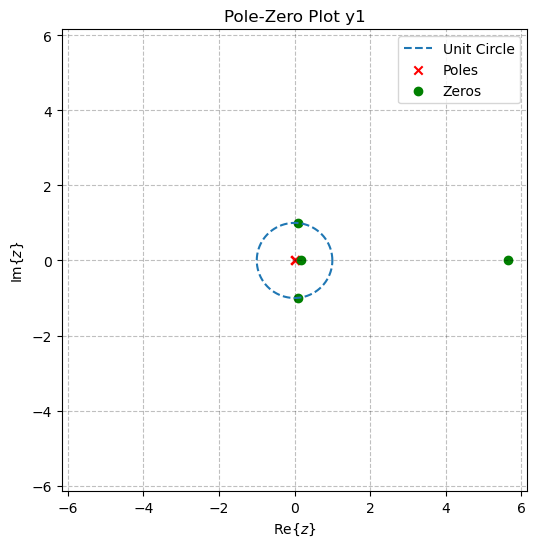

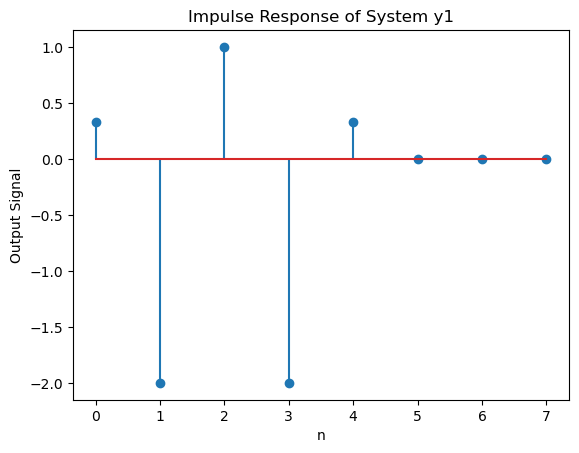

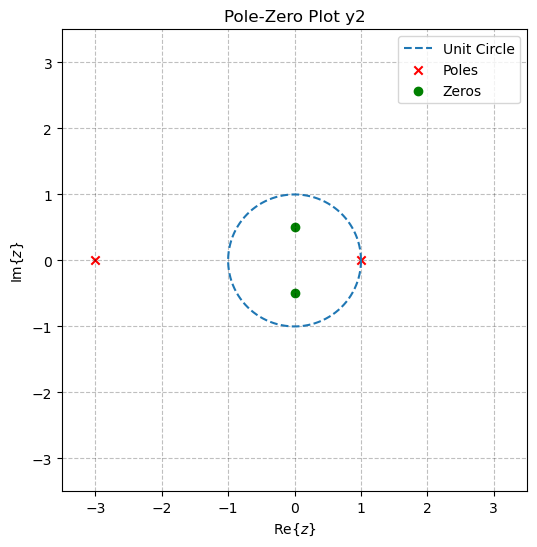

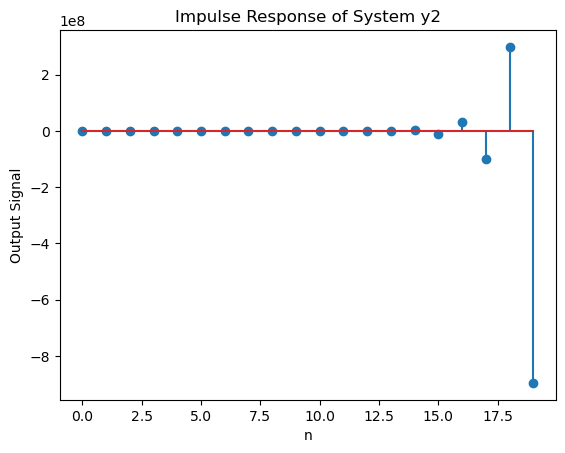

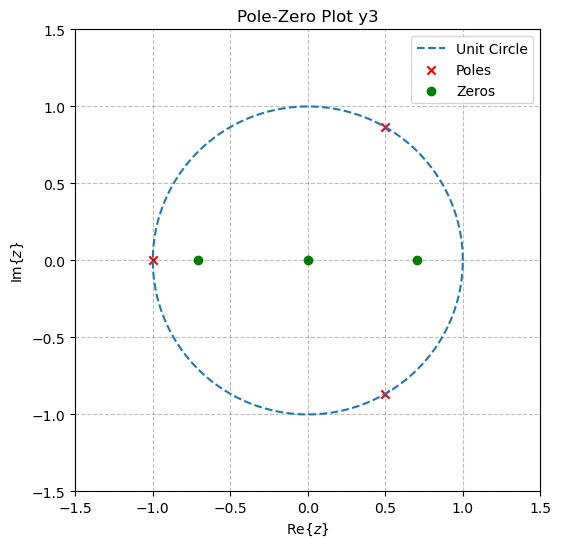

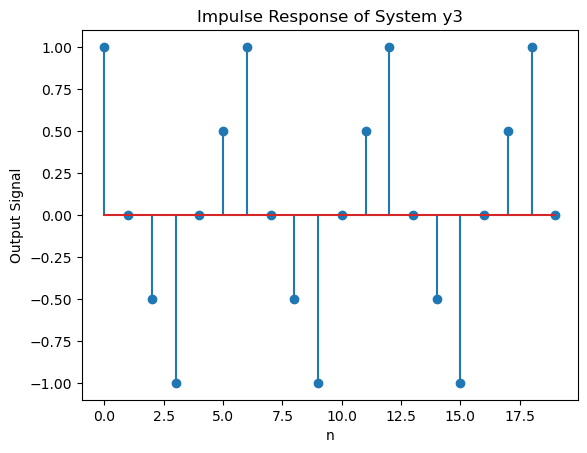

In [19]:
#Code for exercise 2:
#(a)
b = [1/3, -2, 1, -2, 1/3]
a = [1,0,0,0,0]

z, p, k = signal.tf2zpk(b, a) # k is system gain -> okay to ignore this

pz_plot(z,p, 'Pole-Zero Plot y1')
n,y = signal.dimpulse((b, a, 1), n=8) # the 1 is for the change in time per sample
h_n = y[0] # need to access output from returned object

plt.figure()
plt.stem(n, h_n) # plot first n samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of System y1')

#(b)
b = [1, 0, 1/4]
a = [1,2,-3]

z, p, k = signal.tf2zpk(b, a) # k is system gain -> okay to ignore this

pz_plot(z,p, "Pole-Zero Plot y2")
n,y = signal.dimpulse((b, a, 1), n=20) # the 1 is for the change in time per sample
h_n = y[0] # need to access output from returned object

plt.figure()
plt.stem(n, h_n) # plot first n samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of System y2')

#(c)
b = [1, 0, -1/2,0]
a = [1,0,0,1]

z, p, k = signal.tf2zpk(b, a) # k is system gain -> okay to ignore this

pz_plot(z,p, "Pole-Zero Plot y3")
n,y = signal.dimpulse((b, a, 1), n=20) # the 1 is for the change in time per sample
h_n = y[0] # need to access output from returned object

plt.figure()
plt.stem(n, h_n) # plot first n samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of System y3')

## Comments here

Comments for 2.a:

The system is BIBO stable because it is causal and its pole is within the unit circle.


Comments for 2.b:

The system is not BIBO stable because it is causal but its poles are out the unit circle.

Comments for 2.c:

The system is marginally stable since its poles are on the unit circle.

# Exercise 3: Windows and Spectral Resolution

**Note: please specify 512 points for each FFT you take in this problem!**

a. Plot the magnitude spectrum (not dB scale) of the following signal using $\textrm{np.fft.rfft()}$.

$$
x_1[n] = 0.5\sin\left(0.5\pi n\right) + 0.02\sin\left(0.6\pi n\right), \quad 0\leq n < 80
$$

What is happening to the second sinusoid with the smaller magnitude in the frequency domain? Is it easy to locate this frequency peak?

b. Fill in the function $\textrm{hamming()}$ below which applies a Hamming window to an input signal. Apply this function to $x_1[n]$ and plot the resulting magnitude spectrum. Is it easier to locate the smaller frequency now?

c. Now let's try resolving two close, but equally large frequency peaks in the below signal $x_2[n]$.

$$
x_2[n] = 0.5\sin\left(0.6\pi n\right) + 0.5\sin\left(0.618\pi n\right), \quad 0\leq n < 80
$$

Plot the magnitude spectrum of $x_2[n]$ (not dB scale) before and after applying the $\textrm{hamming()}$ function. Is it easier to differentiate between the two peaks after applying the Hamming window? Why or why not? **Hint: think about the tradeoff between rectangular and Hamming windows!**


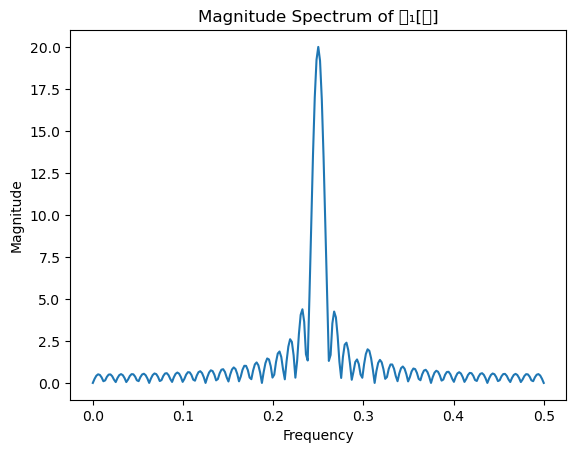

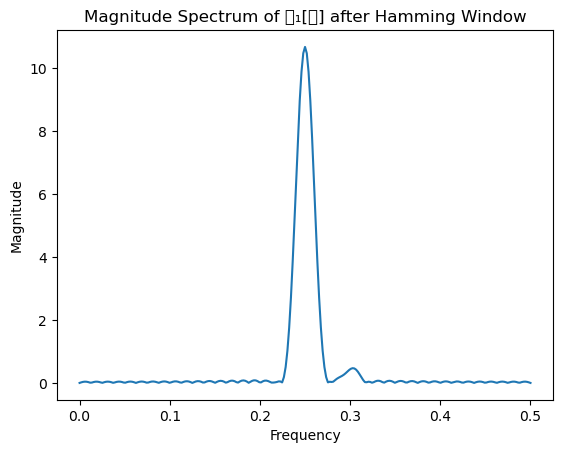

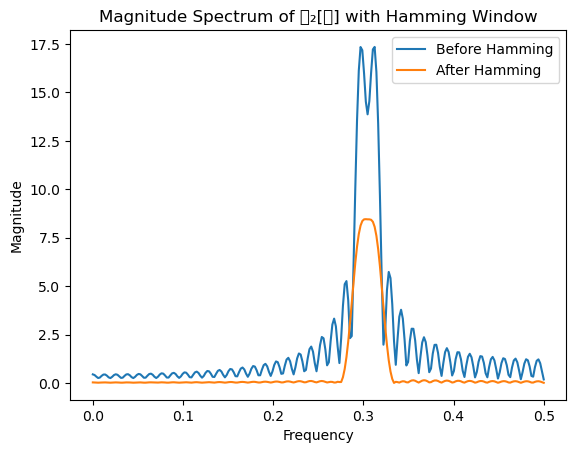

In [23]:
#Code for part 3.a:

# Generate the signal 𝑥₁[𝑛]
n = np.arange(80)
x1_n = 0.5 * np.sin(0.5 * np.pi * n) + 0.02 * np.sin(0.6 * np.pi * n)

# Compute the FFT and plot the magnitude spectrum
fft_result = np.fft.rfft(x1_n, n=512)
freq = np.fft.rfftfreq(512, d=1)
magnitude_spectrum = np.abs(fft_result)

plt.plot(freq, magnitude_spectrum)
plt.title('Magnitude Spectrum of 𝑥₁[𝑛]')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()


#Code for part 3.b:
def hamming(x):
    #apply a hamming window to the signal
    window = signal.hamming(len(x))
    windowed_signal=x * window
    return windowed_signal

x1_n_hamming = hamming(x1_n)

# Compute the FFT and plot the magnitude spectrum after applying Hamming window
fft_result_hamming = np.fft.rfft(x1_n_hamming, n=512)
magnitude_spectrum_hamming = np.abs(fft_result_hamming)

plt.plot(freq, magnitude_spectrum_hamming)
plt.title('Magnitude Spectrum of 𝑥₁[𝑛] after Hamming Window')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

#Code for part 3.c:

# Generate the signal 𝑥₂[𝑛]
x2_n = 0.5 * np.sin(0.6 * np.pi * n) + 0.5 * np.sin(0.618 * np.pi * n)

# Compute the FFT and plot the magnitude spectrum before applying Hamming window
fft_result_x2 = np.fft.rfft(x2_n, n=512)
magnitude_spectrum_x2 = np.abs(fft_result_x2)

plt.plot(freq, magnitude_spectrum_x2, label='Before Hamming')

# Apply Hamming window to 𝑥₂[𝑛]
x2_n_hamming = hamming(x2_n)

# Compute the FFT and plot the magnitude spectrum after applying Hamming window
fft_result_x2_hamming = np.fft.rfft(x2_n_hamming, n=512)
magnitude_spectrum_x2_hamming = np.abs(fft_result_x2_hamming)

plt.plot(freq, magnitude_spectrum_x2_hamming, label='After Hamming')
plt.title('Magnitude Spectrum of 𝑥₂[𝑛] with Hamming Window')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()
plt.show()


## Comments here

Comments for part 3.a:

It appears as a smaller peak in the spectrum. Locating this frequency peak might be relatively hard due to its lower magnitude, which may be mixed with the side lobes of the main peak. We can roughly tell that the main peak is located at f=0.25 and the minor peak is located at f=0.3.

Comments for part 3.b:

It is much easier to locate the smaller frequency now.

Comments for part 3.c:

No, it becomes harder to distinguish since the hamming window will result in broader peaks and leads to aliasing of two peaks due to their closeness in frequency domain.

# Exercise 4: Chirp Redux

For this exercise, we will revisit the chirp activity from Lab 4 but this time with the help of spectrograms to visualize our chirps. The below provided code creates a five second long chirp signal with sampling rate $f_s = 44,100~Hz$ and maximum signal frequency $22,050~Hz$. Recall that the $\textrm{signal.chirp}$ function linearly sweeps between the requested frequencies over the set time interval. Hint: referring back to Labs 4 and 5 will help with understanding the chirp function and plotting spectrograms, respectively.

a. Plot the spectrogram of the original chirp signal we have generated for you.

b. Reduce the sampling rate of the original chirp signal by a factor of 9. Plot the resulting spectrogram and explain what you see. If we listened to this audio signal, how many rises and falls would you hear? **Note: you may either create a new chirp signal using the requested lower sampling or perform downsampling without an anti-aliasing filter.**

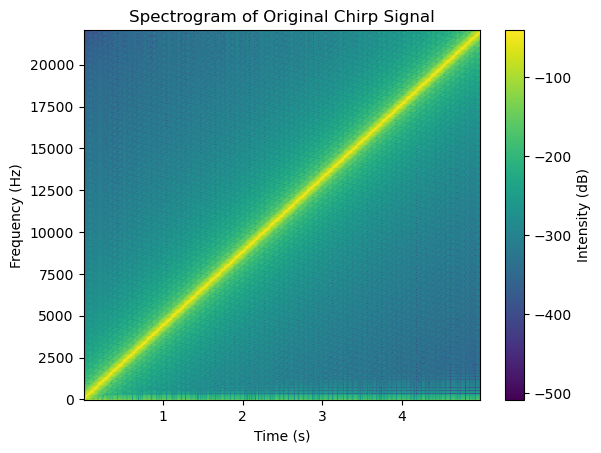

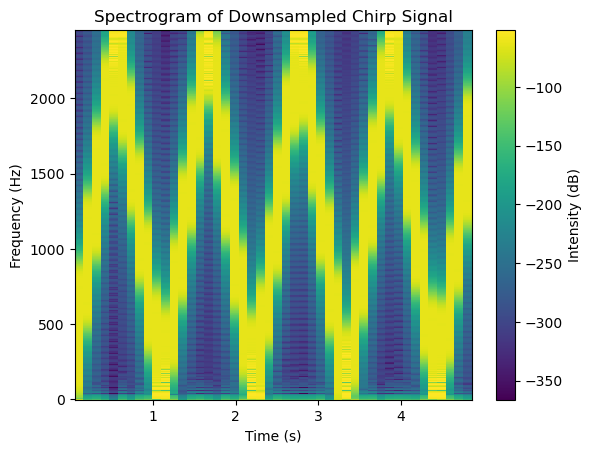

In [32]:
Fs = 44100 #sampling rate for audio clip in Hz
t1 = 5 #make clips 5 seconds
t = np.linspace(0,t1,t1*Fs)
f0 = 0 #start frequency (Hz)
f1 = 22050 #end frequency (Hz)
chirp_original = signal.chirp(t, f0 = f0, t1 = t1, f1 = f1)
nfft = 1024

#Code for part 4.a:
f_a, t_a, S_a = signal.spectrogram(chirp_original, fs=Fs, nperseg=nfft, noverlap=int(nfft/2), nfft=nfft)
plt.pcolormesh(t_a, f_a, 20 * np.log10(S_a))
plt.title('Spectrogram of Original Chirp Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Intensity (dB)')
plt.show()

#Code for part 4.b:
Fs_downsampled = Fs / 9
t_downsampled = np.linspace(0, t1, int(t1 * Fs_downsampled))
chirp_downsampled = signal.chirp(t_downsampled, f0=f0, t1=t1, f1=f1)

# Calculate and plot the spectrogram of the downsampled chirp signal
f_a_downsampled, t_a_downsampled, S_a_downsampled = signal.spectrogram(chirp_downsampled, fs=Fs_downsampled, nperseg=nfft, noverlap=int(nfft/2), nfft=nfft)
plt.pcolormesh(t_a_downsampled, f_a_downsampled, 20 * np.log10(S_a_downsampled))
plt.title('Spectrogram of Downsampled Chirp Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Intensity (dB)')
plt.show()


## Comments here

Comments for 4.b:

After downsampling, I can see a rough sinusoid shape for the high intensity parts. I may hear 5 rises and 4 downs in audio.

# Exercise 5: FIR Filter Design

a. Given the audio signal file ``Sound_original.wav``, compute and display the full FFT magnitude spectrum (no dB scale). Try listening to it!

b. Now let's assume that we pass this audio signal into a system described as followed.

<img src="./sys_illus.png" alt="Drawing" style="width: 600px;"/>

where $x[n]$ is our audio signal, $H(\omega)$ is an LTI system with impulse response $h[n]$, $d[n]$ is some noise, and $y[n]$ is the ouput. 
For this question, we want to simulate the ouput result $y[n]$.

We only know that the LTI system $H(\omega)$ is acting like a low-pass filter with a cutoff frequency of $\frac{\pi}{3}$. Use $\textrm{signal.remez()}$ to obtain the impulse response of this system assuming the filter length is $N = 100$ and the transition bandwidth is $\frac{\pi}{10}$. Plot magnitude response **on a dB scale** using the provided $\textrm{sig2db()}$ function. 

c. Now, we can obtain output $y[n]$ by filtering $x[n]$ with $h[n]$ and adding $d[n]$ after filtering. 

Here, $d[n]$ is assumed to be additive white Gaussian noise (AWGN). We can create our noise $d[n]$ by typing

``d = 2500 * np.random.randn(len(x_filtered))``

Compute $y[n]$ by summing your filtered audio signal $x[n]*h[n]$ and d. Try listening to y! Plot the FFT magnitude spectrum of $d[n]$ and the FFT magnitude spectrum of $y[n]$ on separate figures (no dB scale). Judging from these two graphs, do you think the simple filtering methods we have discussed in class will be able to perfectly separate our noise $d[n]$ from the filtered audio $x[n]*h[n]$?

/var/folders/ty/9jkq3llx43v5914r3183tb3w0000gn/T/ipykernel_28603/3881839733.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs,original = wavfile.read('Sound_original.wav')


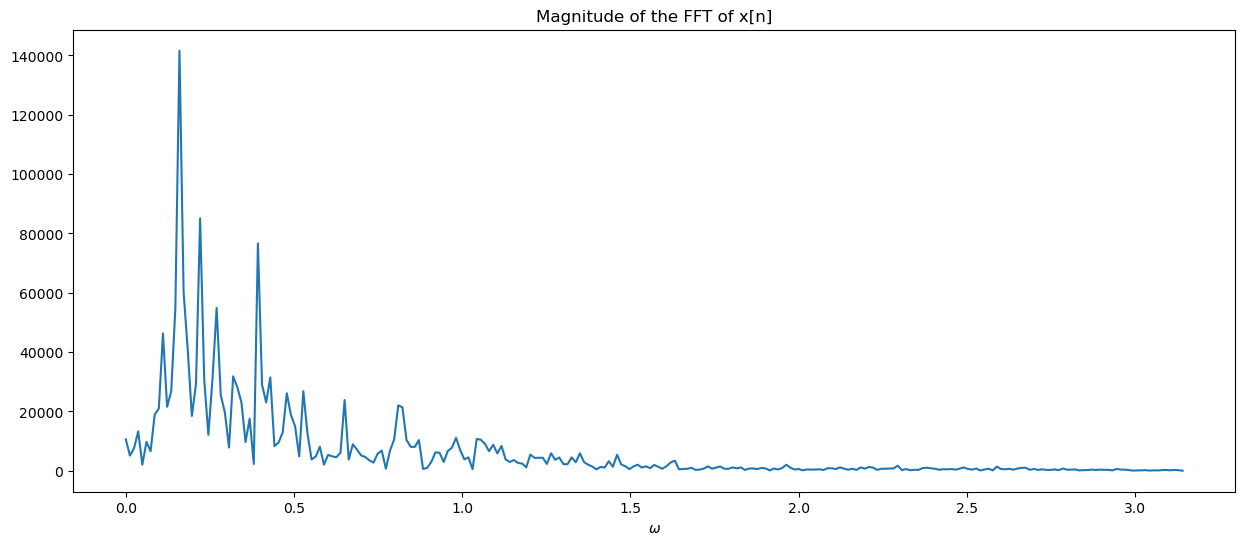

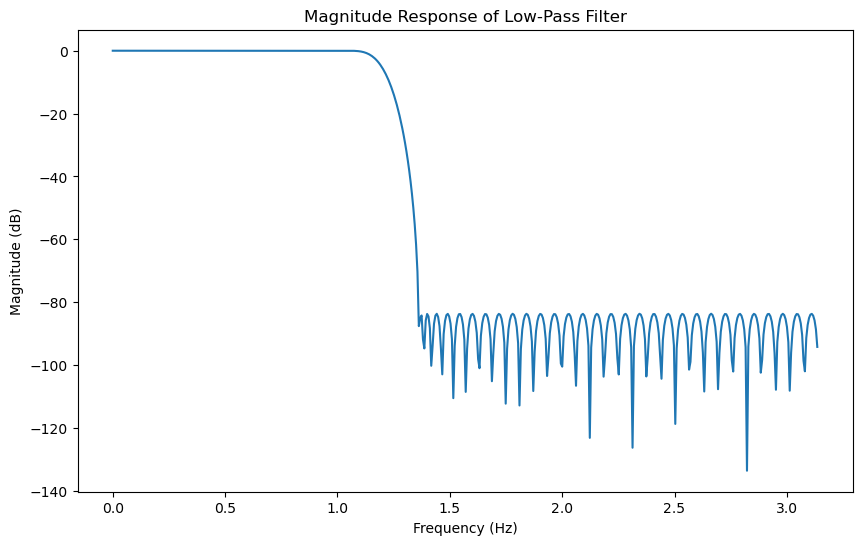

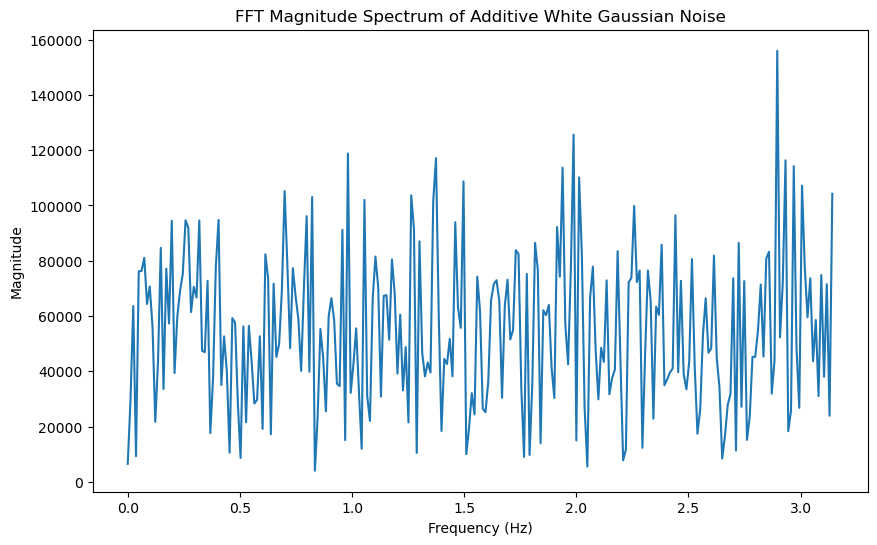

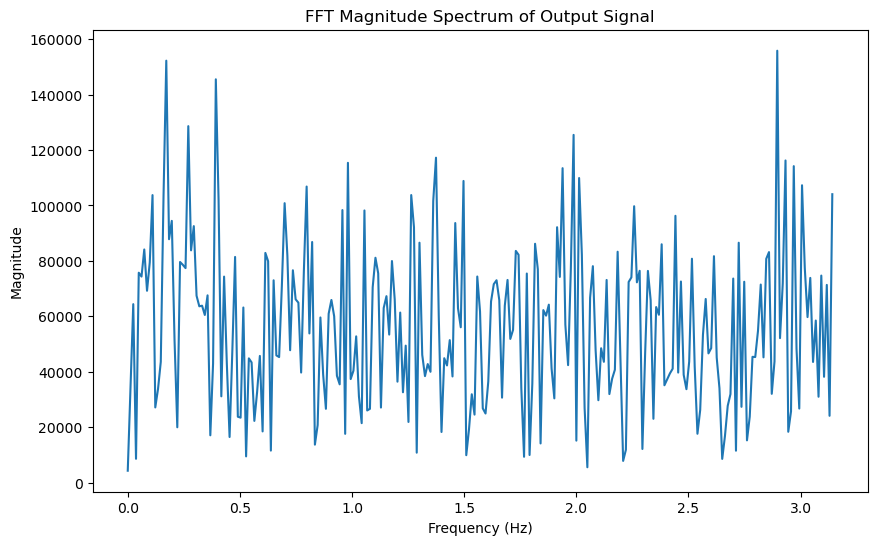

In [63]:
fs,original = wavfile.read('Sound_original.wav')

#Code for 5.a:
audio_fft = np.fft.rfft(original, 512)
w = np.linspace(0,np.pi,len(audio_fft))

plt.figure(figsize=(15,6))
plt.plot(w, abs(audio_fft))
plt.xlabel('$\omega$')
plt.title('Magnitude of the FFT of x[n]')


#Code for 5.b:


N = 100
transition_bandwidth = 1 / 10
cutoff_frequency = 1 / 3

# Design low-pass filter using remez
h = signal.remez(N, [0, cutoff_frequency, cutoff_frequency + transition_bandwidth, 1], [1, 0], fs=2)

# Plot magnitude response on a dB scale
def sig2db(x):
    return 20 * np.log10(np.abs(x))

a=[1,0]
w, h_freq = signal.freqz(h,a)
plt.figure(figsize=(10, 6))
plt.title('Magnitude Response of Low-Pass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.plot(w, sig2db(h_freq))
plt.show()
#Code for 5.c:

x_filtered = signal.convolve(original, h, mode='full')
d = 2500 * np.random.randn(len(x_filtered))
plt.figure(figsize=(10, 6))
plt.title('FFT Magnitude Spectrum of Additive White Gaussian Noise')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
D=np.fft.rfft(d, 512)
w = np.linspace(0,np.pi,len(D))
plt.plot(w, abs(D))

# Plot FFT magnitude spectrum of the output signal
plt.figure(figsize=(10, 6))
plt.title('FFT Magnitude Spectrum of Output Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
y=x_filtered+d
Y=np.fft.rfft(y, 512)
w = np.linspace(0,np.pi,len(Y))
plt.plot(w, abs(Y))

In [54]:
Audio(original, rate = fs)

In [64]:
Audio(y,rate= fs)

## Comments here

Comments for 5.c:

It could probably work better if the noise was added before the filter, but now the noise has probably completely distorted the original signal. We also won't be able to recover the original material, or it would be very hard to do so.

# Submission Instructions:

Please place all files in one folder, compress that folder as a zip file, and name the zip file ``netid_labfinal``. Submit your zip file to Canvas like previous labs.